# Planarian lineages: wildtype samples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

scanpy==1.0.3 anndata==0.5.8 numpy==1.13.1 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


Some plotting parameters.

In [2]:
paga_plot_params = dict(
    legend_fontsize=5,
    solid_edges='confidence_tree',
    dashed_edges='confidence',
    root='neoblast 1',
    layout='rt_circular',
    node_size_scale=0.5,
    node_size_power=0.9,
    max_edge_width=0.7,
    fontsize=3.5)

Get the data.

In [3]:
adata = sc.read('./write/planaria.h5ad')

In [4]:
adata_full = sc.read('./data/dge.txt', cache=True).T

... reading from cache file ./cache/data-dge.h5ad


Reduce to the 7377 wildtype cells.

In [5]:
adata = adata[adata_full.obs_names.str.startswith(('plan1', 'plan2', 'dmso', 'life'))]
adata.n_obs

7377

Compute the tSNE coordinates.

In [6]:
sc.tl.tsne(adata)

computing tSNE
    using data matrix X directly
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:01:18.53)


Compute PAGA.

In [7]:
sc.pp.neighbors(adata, n_neighbors=30)
sc.tl.paga(adata, groups='clusters')

computing neighbors
    initialized `.distances` `.connectivities` `.eigen_values` `.eigen_basis` `.distances_dpt`
    using data matrix X directly
    finished (0:00:06.40)
running partition-based graph abstraction (PAGA)
    initialized `.distances` `.connectivities` `.eigen_values` `.eigen_basis` `.distances_dpt`
    finished (0:00:00.71)


saving figure to file ./figures/paga_compare_wildtype.png


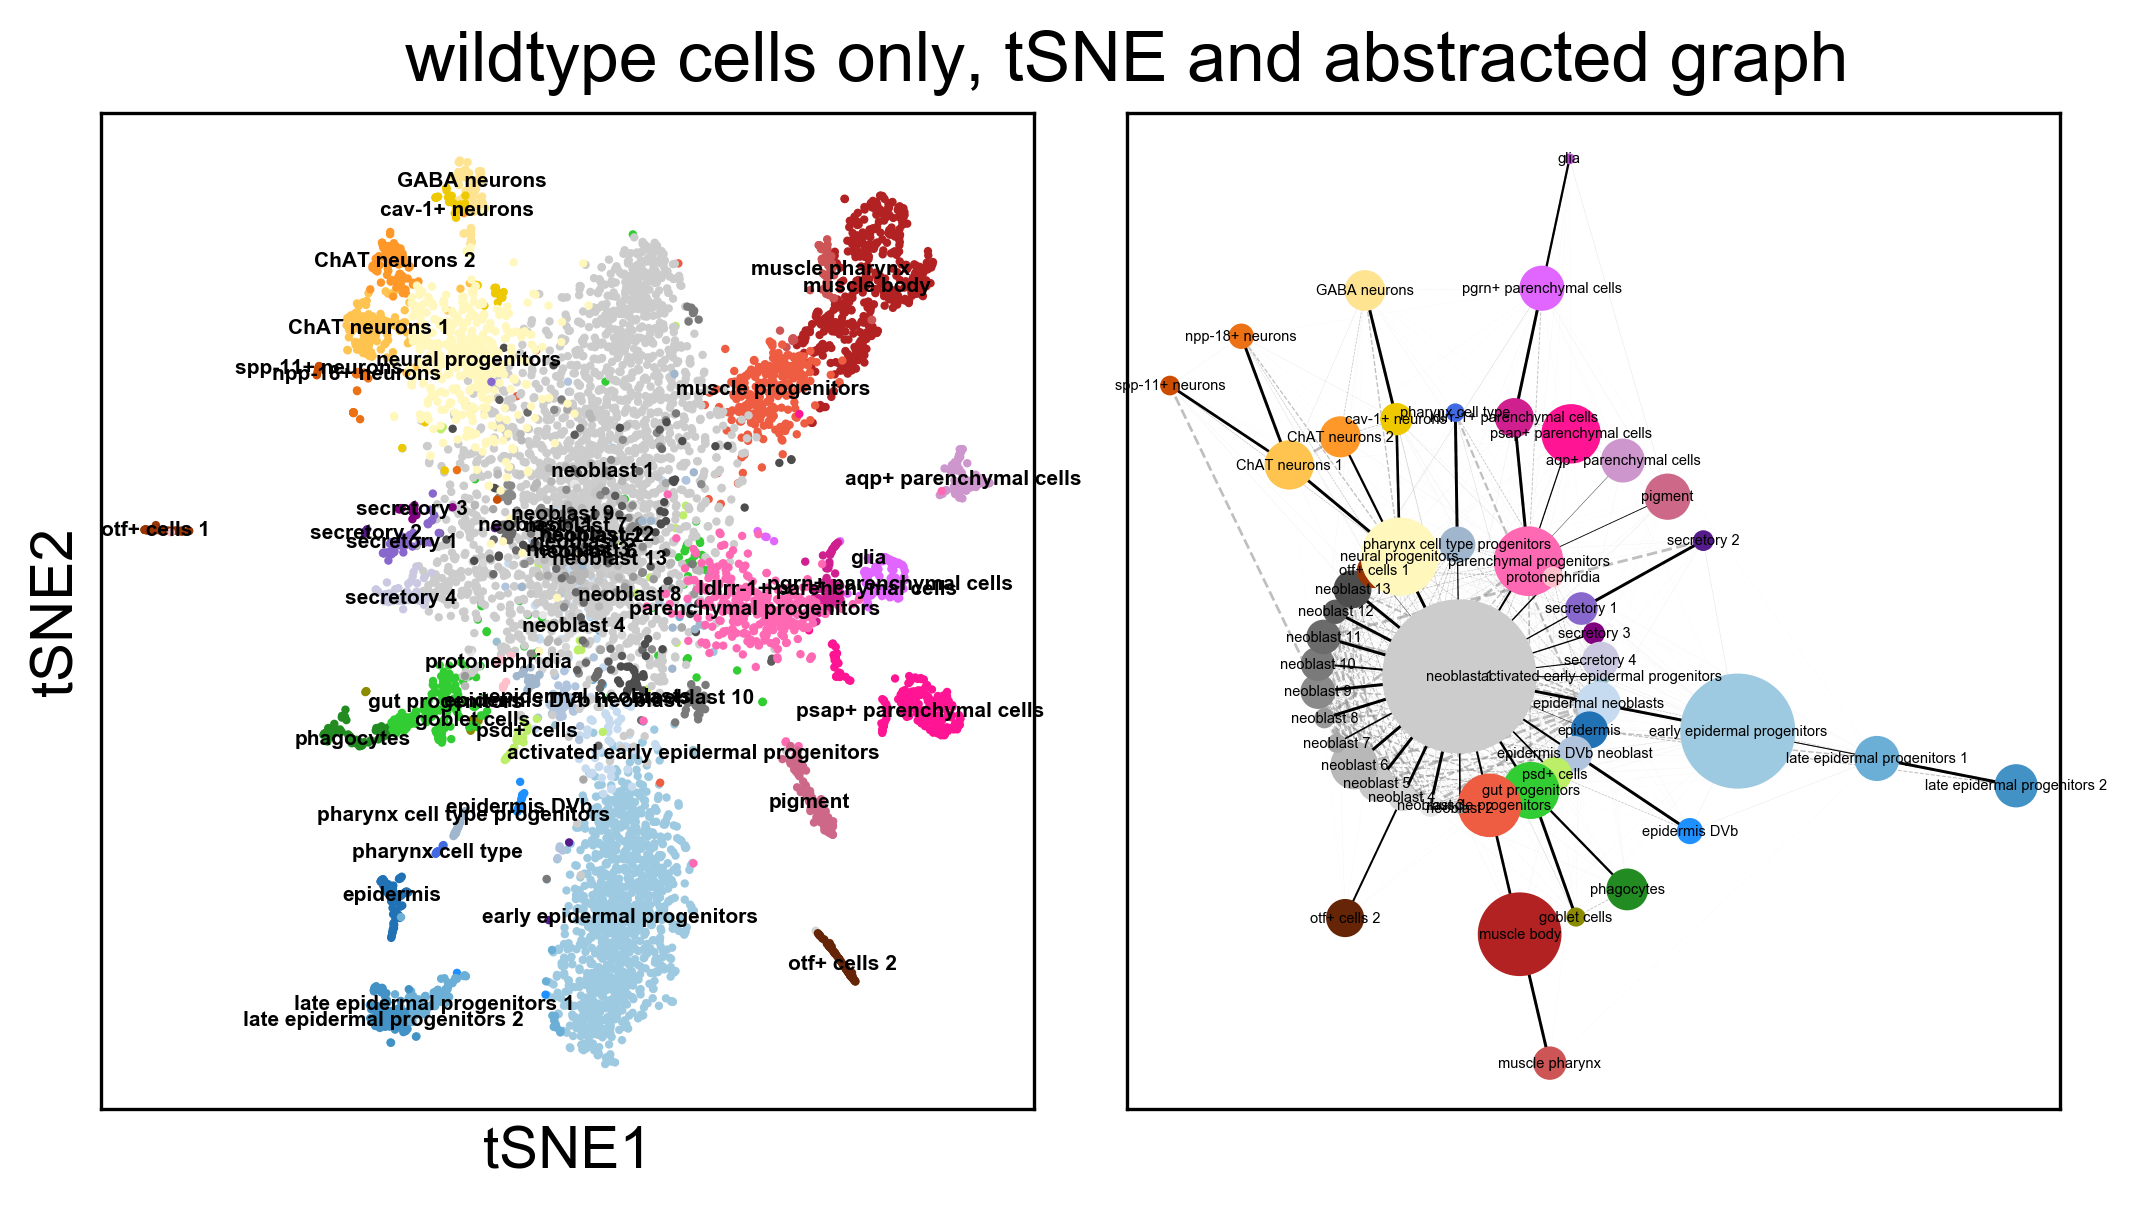

In [8]:
sc.pl.paga_compare(adata, title='wildtype cells only, tSNE and abstracted graph', **paga_plot_params, save='_wildtype')